In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%store -r clean_sales_weekly_df
%store -r clean_death_counts_df

In [4]:
display(clean_sales_weekly_df.head())
display(clean_death_counts_df.head())

,Acetic Acid Derivatives,Propionic Acid Derivatives,Salicylic Acid and Derivatives,Pyrazolones and Anilides,Anxiolytic Drugs,Hypnotics and Sedatives Drugs,Drugs for Obstructive Airway Diseases,Antihistamines for systemic use,total
Date,,,,,,,,,
2014-01-05,14.00,11.67,21.3,185.95,41.0,0.0,32.0,7.0,312.92
2014-01-12,29.33,12.68,37.9,190.70,88.0,5.0,21.0,7.2,391.81
2014-01-19,30.67,26.34,45.9,218.40,80.0,8.0,29.0,12.0,450.31
2014-01-26,34.00,32.37,31.5,179.60,80.0,8.0,23.0,10.0,398.47
2014-02-02,31.02,23.35,20.7,159.88,84.0,12.0,29.0,12.0,371.95


cause_group,Alzheimer disease and dementia,Circulatory diseases,Malignant neoplasms,Other select causes,Respiratory diseases,total
week_ending_date,,,,,,
2015-01-10,12411,38866,23871,7708,15953,98809
2015-01-17,12735,38081,23991,7766,15185,97758
2015-01-24,11649,36395,23462,7553,14352,93411
2015-01-31,11279,35525,23585,7174,13506,91069
2015-02-07,11045,36279,23454,7056,13020,90854


In [5]:
drugs_prefix = 'drug_sales_'
deaths_prefix = 'death_counts_'
clean_sales_weekly_df = clean_sales_weekly_df.add_prefix(drugs_prefix)
clean_death_counts_df = clean_death_counts_df.add_prefix(deaths_prefix)

In [6]:
def add_year_and_week(df, date_column):
    df = df.reset_index()
    df['week'] = df[date_column].dt.isocalendar().week
    df['year'] = df[date_column].dt.year
    return df


In [7]:
clean_sales_weekly_df = add_year_and_week(clean_sales_weekly_df, 'Date')
clean_death_counts_df = add_year_and_week(clean_death_counts_df, 'week_ending_date')
display(clean_sales_weekly_df.head())
display(clean_death_counts_df.head())


,Date,drug_sales_Acetic Acid Derivatives,drug_sales_Propionic Acid Derivatives,drug_sales_Salicylic Acid and Derivatives,drug_sales_Pyrazolones and Anilides,drug_sales_Anxiolytic Drugs,drug_sales_Hypnotics and Sedatives Drugs,drug_sales_Drugs for Obstructive Airway Diseases,drug_sales_Antihistamines for systemic use,drug_sales_total,week,year
0,2014-01-05,14.00,11.67,21.3,185.95,41.0,0.0,32.0,7.0,312.92,1,2014
1,2014-01-12,29.33,12.68,37.9,190.70,88.0,5.0,21.0,7.2,391.81,2,2014
2,2014-01-19,30.67,26.34,45.9,218.40,80.0,8.0,29.0,12.0,450.31,3,2014
3,2014-01-26,34.00,32.37,31.5,179.60,80.0,8.0,23.0,10.0,398.47,4,2014
4,2014-02-02,31.02,23.35,20.7,159.88,84.0,12.0,29.0,12.0,371.95,5,2014


cause_group,week_ending_date,death_counts_Alzheimer disease and dementia,death_counts_Circulatory diseases,death_counts_Malignant neoplasms,death_counts_Other select causes,death_counts_Respiratory diseases,death_counts_total,week,year
0,2015-01-10,12411,38866,23871,7708,15953,98809,2,2015
1,2015-01-17,12735,38081,23991,7766,15185,97758,3,2015
2,2015-01-24,11649,36395,23462,7553,14352,93411,4,2015
3,2015-01-31,11279,35525,23585,7174,13506,91069,5,2015
4,2015-02-07,11045,36279,23454,7056,13020,90854,6,2015


In [8]:
death_and_drug_sales_df = pd.merge(clean_sales_weekly_df, clean_death_counts_df, on= ['week', 'year'])
death_and_drug_sales_df.head()

,Date,drug_sales_Acetic Acid Derivatives,drug_sales_Propionic Acid Derivatives,drug_sales_Salicylic Acid and Derivatives,drug_sales_Pyrazolones and Anilides,drug_sales_Anxiolytic Drugs,drug_sales_Hypnotics and Sedatives Drugs,drug_sales_Drugs for Obstructive Airway Diseases,drug_sales_Antihistamines for systemic use,drug_sales_total,week,year,week_ending_date,death_counts_Alzheimer disease and dementia,death_counts_Circulatory diseases,death_counts_Malignant neoplasms,death_counts_Other select causes,death_counts_Respiratory diseases,death_counts_total
0,2015-01-11,19.34,37.311,32.9,234.40,98.0,7.0,39.0,10.0,477.951,2,2015,2015-01-10,12411,38866,23871,7708,15953,98809
1,2015-01-18,39.35,30.350,38.8,231.45,115.0,4.0,32.0,9.0,499.950,3,2015,2015-01-17,12735,38081,23991,7766,15185,97758
2,2015-01-25,29.69,14.538,32.2,246.55,128.0,3.0,58.0,8.0,519.978,4,2015,2015-01-24,11649,36395,23462,7553,14352,93411
3,2015-02-01,32.19,36.580,29.7,199.30,101.0,8.0,40.0,9.0,455.770,5,2015,2015-01-31,11279,35525,23585,7174,13506,91069
4,2015-02-08,20.34,31.329,31.6,195.25,74.0,1.0,36.0,11.0,400.519,6,2015,2015-02-07,11045,36279,23454,7056,13020,90854


In [9]:
death_and_drug_sales_df.columns

Index(['Date', 'drug_sales_Acetic Acid Derivatives',
       'drug_sales_Propionic Acid Derivatives',
       'drug_sales_Salicylic Acid and Derivatives',
       'drug_sales_Pyrazolones and Anilides', 'drug_sales_Anxiolytic Drugs',
       'drug_sales_Hypnotics and Sedatives Drugs',
       'drug_sales_Drugs for Obstructive Airway Diseases',
       'drug_sales_Antihistamines for systemic use', 'drug_sales_total',
       'week', 'year', 'week_ending_date',
       'death_counts_Alzheimer disease and dementia',
       'death_counts_Circulatory diseases', 'death_counts_Malignant neoplasms',
       'death_counts_Other select causes', 'death_counts_Respiratory diseases',
       'death_counts_total'],
      dtype='object')

In [10]:
death_and_drug_sales_df = death_and_drug_sales_df.drop(columns=['week', 'year', 'week_ending_date'])
death_and_drug_sales_df= death_and_drug_sales_df.set_index('Date')

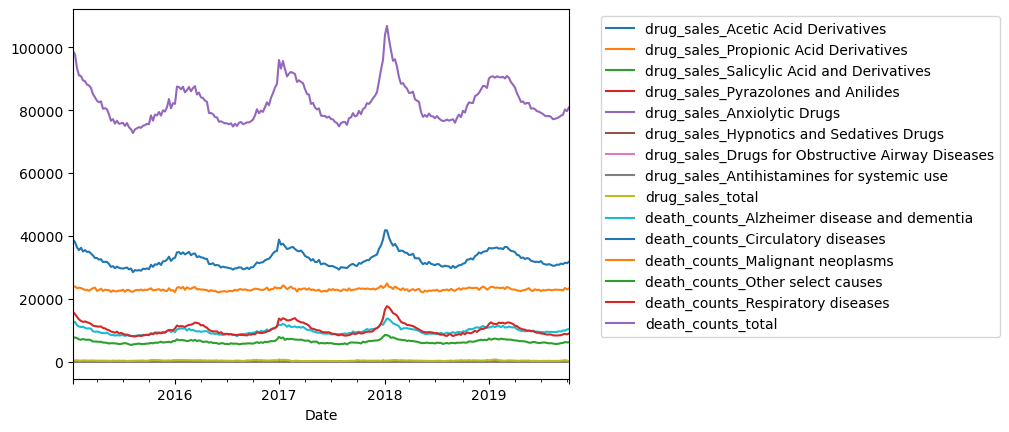

In [11]:
death_and_drug_sales_df.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

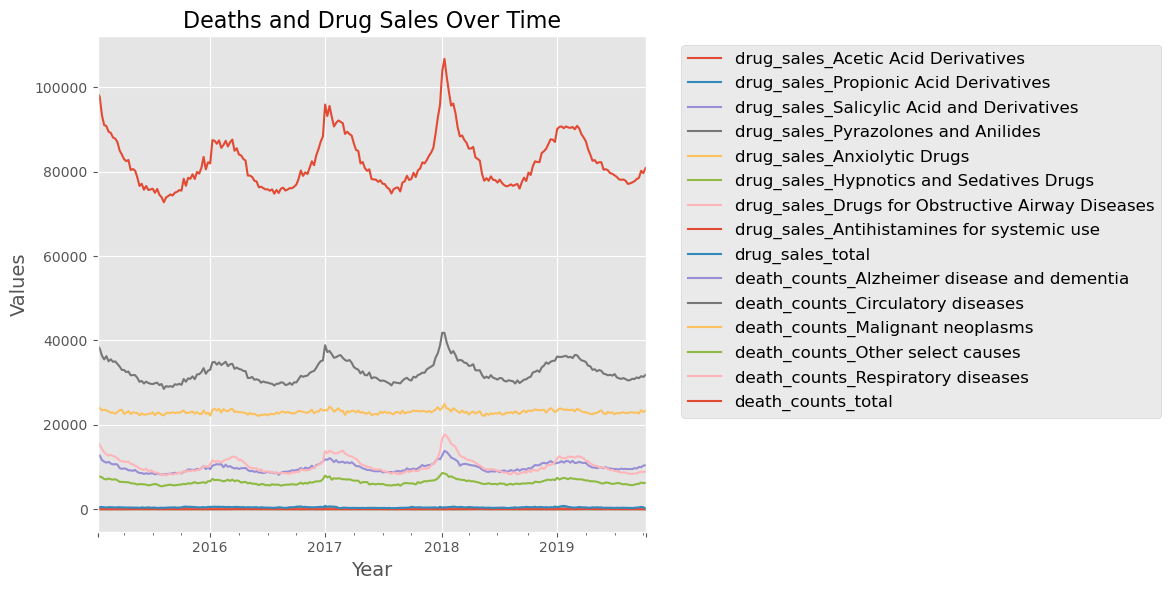

In [12]:
# Set plot style for a cleaner look
plt.style.use('ggplot')

# Increase figure size for better visibility
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
death_and_drug_sales_df.plot(ax=ax)

# Add title and labels to the axes
plt.title('Deaths and Drug Sales Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Improve legend placement and make sure it's not overlapping the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
corr_matrix = death_and_drug_sales_df.corr()
corr_matrix

,drug_sales_Acetic Acid Derivatives,drug_sales_Propionic Acid Derivatives,drug_sales_Salicylic Acid and Derivatives,drug_sales_Pyrazolones and Anilides,drug_sales_Anxiolytic Drugs,drug_sales_Hypnotics and Sedatives Drugs,drug_sales_Drugs for Obstructive Airway Diseases,drug_sales_Antihistamines for systemic use,drug_sales_total,death_counts_Alzheimer disease and dementia,death_counts_Circulatory diseases,death_counts_Malignant neoplasms,death_counts_Other select causes,death_counts_Respiratory diseases,death_counts_total
drug_sales_Acetic Acid Derivatives,1.000000,0.167220,0.309709,0.157381,0.108007,0.049025,0.029156,0.029944,0.269697,-0.125374,-0.112180,-0.047769,-0.093288,-0.118777,-0.115253
drug_sales_Propionic Acid Derivatives,0.167220,1.000000,0.315453,0.401482,0.181267,0.066174,0.176456,-0.137830,0.477259,0.120016,0.163760,0.160259,0.180102,0.184806,0.171640
drug_sales_Salicylic Acid and Derivatives,0.309709,0.315453,1.000000,0.394002,0.293365,0.048147,0.042383,-0.160516,0.476019,0.059095,0.123111,0.127690,0.148363,0.199248,0.143863
drug_sales_Pyrazolones and Anilides,0.157381,0.401482,0.394002,1.000000,0.243008,0.125261,0.414735,-0.471042,0.930390,0.403591,0.410316,0.436348,0.444526,0.331634,0.409414
drug_sales_Anxiolytic Drugs,0.108007,0.181267,0.293365,0.243008,1.000000,0.293811,0.205556,-0.100045,0.462428,0.191856,0.187032,0.147838,0.200853,0.188793,0.195624
drug_sales_Hypnotics and Sedatives Drugs,0.049025,0.066174,0.048147,0.125261,0.293811,1.000000,0.237632,-0.098236,0.237445,0.104340,0.103102,0.015418,0.075978,0.024307,0.075228
drug_sales_Drugs for Obstructive Airway Diseases,0.029156,0.176456,0.042383,0.414735,0.205556,0.237632,1.000000,-0.151913,0.593607,0.406626,0.405676,0.359582,0.415163,0.308481,0.392704
drug_sales_Antihistamines for systemic use,0.029944,-0.137830,-0.160516,-0.471042,-0.100045,-0.098236,-0.151913,1.000000,-0.323223,-0.358071,-0.279698,-0.447831,-0.314718,-0.196021,-0.295953
drug_sales_total,0.269697,0.477259,0.476019,0.930390,0.462428,0.237445,0.593607,-0.323223,1.000000,0.403903,0.426102,0.411513,0.456933,0.357842,0.423244
death_counts_Alzheimer disease and dementia,-0.125374,0.120016,0.059095,0.403591,0.191856,0.104340,0.406626,-0.358071,0.403903,1.000000,0.948935,0.726171,0.935166,0.863650,0.958587


In [14]:
corr_stacked = corr_matrix.stack().reset_index()
corr_stacked.columns = ['Variable 1', 'Variable 2', 'Correlation']

In [15]:
corr_stacked = corr_stacked.sort_values(by='Correlation', ascending=False)
corr_stacked = corr_stacked[corr_stacked['Variable 1'] != corr_stacked['Variable 2']]
corr_stacked = corr_stacked.iloc[::2]

In [16]:
corr_stacked

,Variable 1,Variable 2,Correlation
220,death_counts_total,death_counts_Circulatory diseases,0.991296
194,death_counts_Other select causes,death_counts_total,0.975494
190,death_counts_Other select causes,death_counts_Circulatory diseases,0.969859
149,death_counts_Alzheimer disease and dementia,death_counts_total,0.958587
209,death_counts_Respiratory diseases,death_counts_total,0.957725
...,...,...,...
187,death_counts_Other select causes,drug_sales_Antihistamines for systemic use,-0.314718
127,drug_sales_total,drug_sales_Antihistamines for systemic use,-0.323223
114,drug_sales_Antihistamines for systemic use,death_counts_Alzheimer disease and dementia,-0.358071
116,drug_sales_Antihistamines for systemic use,death_counts_Malignant neoplasms,-0.447831


In [17]:
def includes_both_data_sets(row):
    all_variables = row['Variable 1'] + row['Variable 2']
    return drugs_prefix in all_variables and deaths_prefix in all_variables

In [18]:
m= corr_stacked.apply(includes_both_data_sets, axis=1)
between_corr = corr_stacked[m]
between_corr

,Variable 1,Variable 2,Correlation
188,death_counts_Other select causes,drug_sales_total,0.456933
57,drug_sales_Pyrazolones and Anilides,death_counts_Other select causes,0.444526
56,drug_sales_Pyrazolones and Anilides,death_counts_Malignant neoplasms,0.436348
130,drug_sales_total,death_counts_Circulatory diseases,0.426102
134,drug_sales_total,death_counts_total,0.423244
102,drug_sales_Drugs for Obstructive Airway Diseases,death_counts_Other select causes,0.415163
131,drug_sales_total,death_counts_Malignant neoplasms,0.411513
153,death_counts_Circulatory diseases,drug_sales_Pyrazolones and Anilides,0.410316
59,drug_sales_Pyrazolones and Anilides,death_counts_total,0.409414
141,death_counts_Alzheimer disease and dementia,drug_sales_Drugs for Obstructive Airway Diseases,0.406626


In [19]:
medium_and_large_corr = between_corr.loc[(between_corr['Correlation'] > .3) | (between_corr['Correlation'] < -.3)]
medium_and_large_corr

,Variable 1,Variable 2,Correlation
188,death_counts_Other select causes,drug_sales_total,0.456933
57,drug_sales_Pyrazolones and Anilides,death_counts_Other select causes,0.444526
56,drug_sales_Pyrazolones and Anilides,death_counts_Malignant neoplasms,0.436348
130,drug_sales_total,death_counts_Circulatory diseases,0.426102
134,drug_sales_total,death_counts_total,0.423244
102,drug_sales_Drugs for Obstructive Airway Diseases,death_counts_Other select causes,0.415163
131,drug_sales_total,death_counts_Malignant neoplasms,0.411513
153,death_counts_Circulatory diseases,drug_sales_Pyrazolones and Anilides,0.410316
59,drug_sales_Pyrazolones and Anilides,death_counts_total,0.409414
141,death_counts_Alzheimer disease and dementia,drug_sales_Drugs for Obstructive Airway Diseases,0.406626


<Axes: xlabel='Date'>

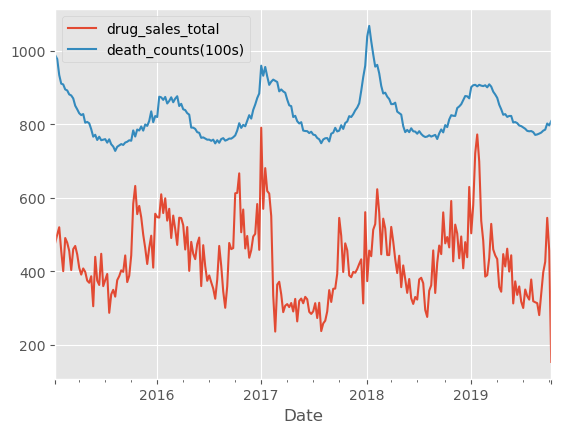

In [20]:
death_and_drug_sales_df['death_counts(100s)'] = death_and_drug_sales_df['death_counts_total'] / 100
death_and_drug_sales_df[['drug_sales_total', 'death_counts(100s)']].plot()

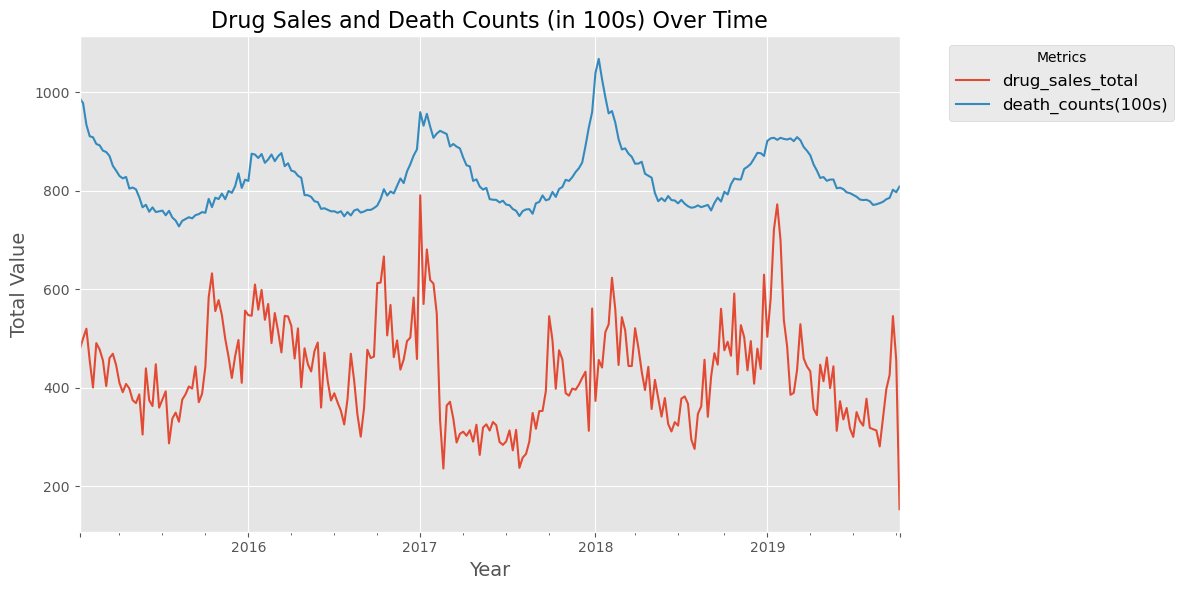

In [24]:
# Create a new column by scaling down death counts
death_and_drug_sales_df['death_counts(100s)'] = death_and_drug_sales_df['death_counts_total'] / 100

# Set plot style
plt.style.use('ggplot')

# Increase figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
death_and_drug_sales_df[['drug_sales_total', 'death_counts(100s)']].plot(ax=ax)

# Add title and axis labels
plt.title('Drug Sales and Death Counts (in 100s) Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Value', fontsize=14)

# Customize legend placement
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Improve layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
death_and_drug_sales_by_week_df = death_and_drug_sales_df.reset_index()
death_and_drug_sales_by_week_df['week'] = death_and_drug_sales_by_week_df['Date'].dt.isocalendar().week
death_and_drug_sales_by_week_df = death_and_drug_sales_by_week_df.groupby(by='week')[['drug_sales_total', 'death_counts(100s)', 'drug_sales_Antihistamines for systemic use']]
death_and_drug_sales_by_week_df = death_and_drug_sales_by_week_df.sum()


In [26]:
death_and_drug_sales_by_week_df

,drug_sales_total,death_counts(100s),drug_sales_Antihistamines for systemic use
week,,,
1,1993.116250,3747.36,50.583333
2,2805.171417,4791.74,46.166667
3,2839.502583,4708.27,64.333333
4,3015.783667,4609.29,55.208333
5,2771.662750,4547.95,64.533333
6,2465.658500,4560.77,58.360000
7,2260.300000,4529.59,57.900000
8,2225.559000,4478.44,65.500000
9,2275.113000,4425.68,88.900000


<Axes: xlabel='Week of year'>

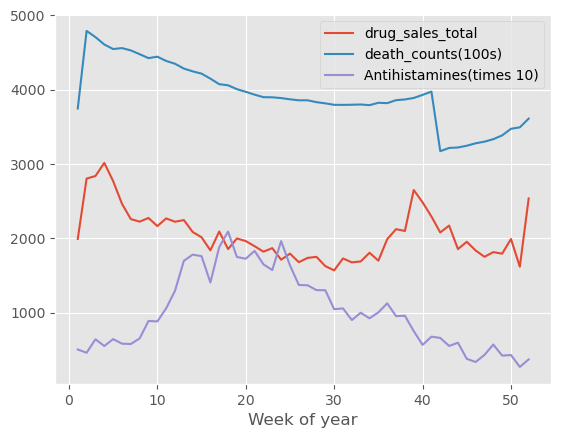

In [27]:
death_and_drug_sales_by_week_df['Antihistamines(times 10)'] = death_and_drug_sales_by_week_df['drug_sales_Antihistamines for systemic use'] *10
death_and_drug_sales_by_week_df = death_and_drug_sales_by_week_df.drop(columns=['drug_sales_Antihistamines for systemic use'])
death_and_drug_sales_by_week_df[0:52].plot(xlabel= 'Week of year')

Column 'drug_sales_Antihistamines for systemic use' not found in the dataframe.


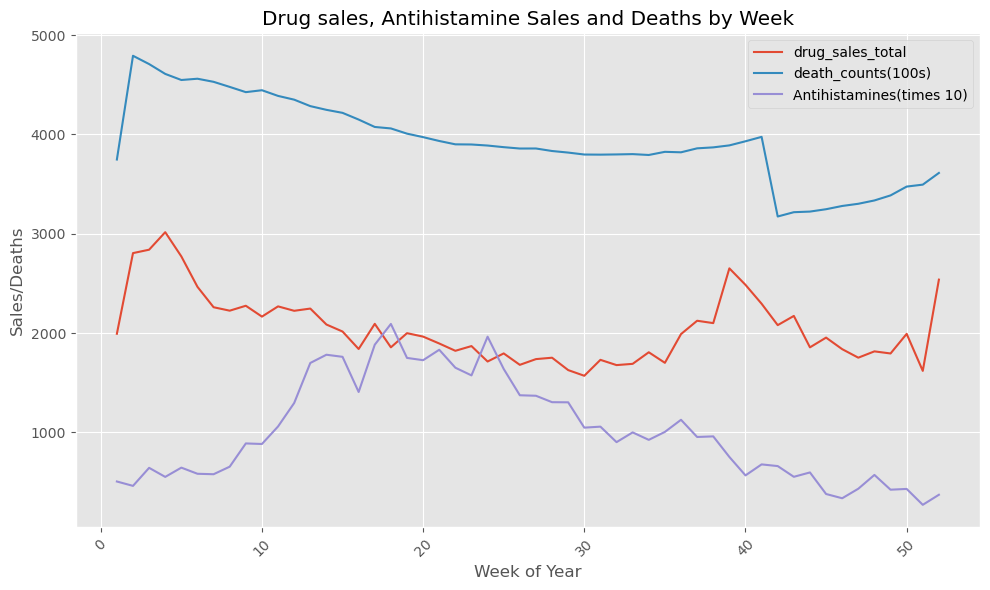

In [31]:

# Assuming death_and_drug_sales_by_week_df is already defined
# Check if the column exists before performing operations
if 'drug_sales_Antihistamines for systemic use' in death_and_drug_sales_by_week_df.columns:
    death_and_drug_sales_by_week_df['Antihistamines(times 10)'] = death_and_drug_sales_by_week_df['drug_sales_Antihistamines for systemic use'] * 10
    death_and_drug_sales_by_week_df = death_and_drug_sales_by_week_df.drop(columns=['drug_sales_Antihistamines for systemic use'])
else:
    print("Column 'drug_sales_Antihistamines for systemic use' not found in the dataframe.")

# Create better visualizations
plt.figure(figsize=(10, 6))  # Increase figure size for better readability

# Plotting the first 52 weeks with improvements
death_and_drug_sales_by_week_df[0:52].plot(
    xlabel='Week of Year',
    ylabel='Sales/Deaths',
    title='Drug sales, Antihistamine Sales and Deaths by Week',
    legend=True,
    grid=True,
    ax=plt.gca()
)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

Column 'drug_sales_Antihistamines for systemic use' not found in the dataframe.


<Figure size 1400x800 with 0 Axes>

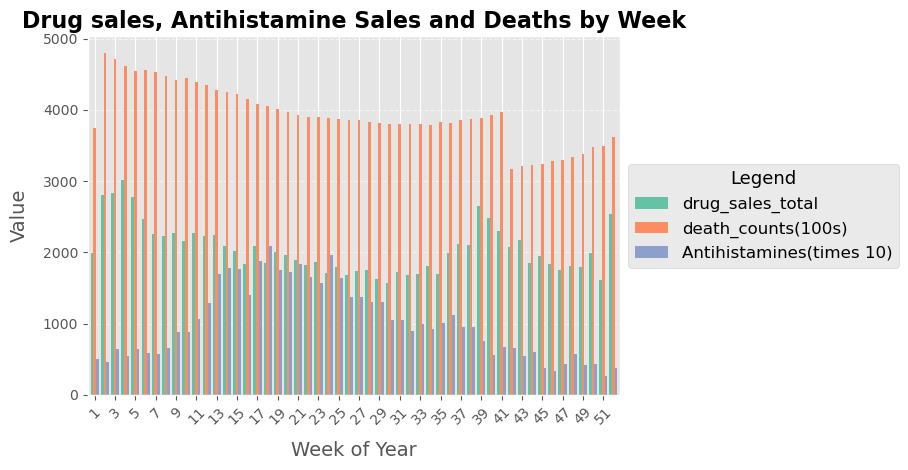

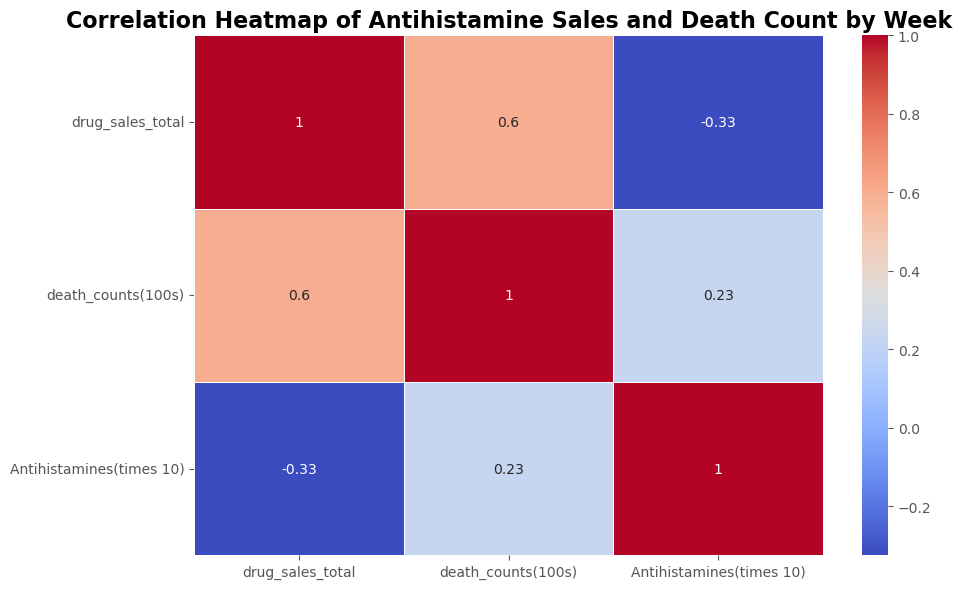

In [37]:

# Assuming death_and_drug_sales_by_week_df is already defined
# Check if the column exists before performing operations
if 'drug_sales_Antihistamines for systemic use' in death_and_drug_sales_by_week_df.columns:
    death_and_drug_sales_by_week_df['Antihistamines(times 10)'] = death_and_drug_sales_by_week_df['drug_sales_Antihistamines for systemic use'] * 10
    death_and_drug_sales_by_week_df = death_and_drug_sales_by_week_df.drop(columns=['drug_sales_Antihistamines for systemic use'])
else:
    print("Column 'drug_sales_Antihistamines for systemic use' not found in the dataframe.")

# Create a bar plot for Antihistamine Sales (times 10) vs Death Count
plt.figure(figsize=(14, 8))
colors = sns.color_palette('Set2')  # Use a more distinct color palette
death_and_drug_sales_by_week_df[0:52].plot(kind='bar', width=0.8, color=colors)
plt.title('Drug sales, Antihistamine Sales and Deaths by Week', fontsize=16, weight='bold')
plt.xlabel('Week of Year', fontsize=14, labelpad=10)
plt.ylabel('Value', fontsize=14, labelpad=10)
plt.xticks(ticks=range(0, 52, 2), labels=death_and_drug_sales_by_week_df.index[0:52:2], rotation=45, fontsize=10)  # Show fewer x-axis labels to reduce crowding
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(title='Legend', fontsize=12, title_fontsize='13', loc='center left', bbox_to_anchor=(1.0, 0.5))  # Move legend to the side
plt.show()

# Alternatively, creating a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(death_and_drug_sales_by_week_df[0:52].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Antihistamine Sales and Death Count by Week', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()